In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [2]:
with open(r"C:\Users\KARTIKAY K\Desktop\ml learning\traffic sign classifier (le-net)\test.p", mode='rb') as testing_data:
    test = pickle.load(testing_data)
with open(r"C:\Users\KARTIKAY K\Desktop\ml learning\traffic sign classifier (le-net)\valid.p", mode='rb') as validation_data:
    valid = pickle.load(validation_data)
with open(r"C:\Users\KARTIKAY K\Desktop\ml learning\traffic sign classifier (le-net)\train.p", mode='rb') as training_data:
    train = pickle.load(training_data)
    
#had problem with using to load data as raw string instead of double backslash so used r"... as used above to make it raw

In [3]:
X_train,y_train = train['features'],train['labels']
X_validation,y_validation = valid['features'],valid['labels']
X_test,y_test = test['features'],test['labels']

In [4]:
X_train.shape

(34799, 32, 32, 3)

1

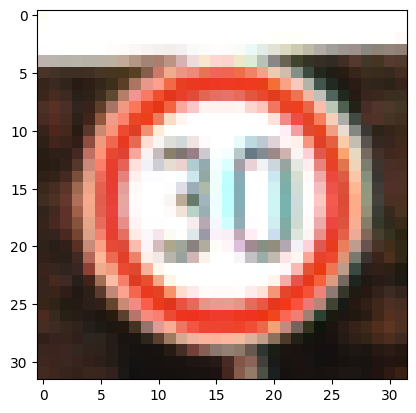

In [5]:
i = 3001
plt.imshow(X_train[i]) #will show the image
y_train[i] #this will show to which class does the image belongs

In [6]:
from sklearn.utils import shuffle
X_train,y_train = shuffle(X_train,y_train)
#problem : data was not shufled as was distributed by classes of signes so used shuffle before training

In [7]:
X_train_gray = np.sum(X_train/3,axis=3,keepdims=True)
#While keeping the dimensions same, we are averaging the 3 colours RGB into one(gray).
#for Reduced Dimensionality , simplicity , noise eduction 

In [8]:
X_test_gray = np.sum(X_test/3,axis=3,keepdims=True)
X_validation_gray = np.sum(X_validation/3,axis=3,keepdims=True)

In [9]:
X_train_gray.shape #now the dimension is 32 by 32 by 1.same for test and valid

(34799, 32, 32, 1)

In [10]:
X_train_gray_norm = (X_train_gray - 128)/128
X_test_gray_norm = (X_test_gray - 128)/128
X_validation_gray_norm = (X_validation_gray - 128)/128
#subtracts 128 from each pixel value in the grayscale training 
#image and then divides it by 128, effectively scaling the pixel values to a range between -1 and 1.

In [11]:
X_train_gray_norm

array([[[[-0.890625  ],
         [-0.88020833],
         [-0.890625  ],
         ...,
         [-0.9296875 ],
         [-0.921875  ],
         [-0.9296875 ]],

        [[-0.8984375 ],
         [-0.8828125 ],
         [-0.890625  ],
         ...,
         [-0.92708333],
         [-0.92447917],
         [-0.921875  ]],

        [[-0.8984375 ],
         [-0.890625  ],
         [-0.890625  ],
         ...,
         [-0.9296875 ],
         [-0.91927083],
         [-0.91927083]],

        ...,

        [[-0.921875  ],
         [-0.92447917],
         [-0.92708333],
         ...,
         [-0.9296875 ],
         [-0.92708333],
         [-0.92708333]],

        [[-0.9296875 ],
         [-0.92447917],
         [-0.92708333],
         ...,
         [-0.92447917],
         [-0.921875  ],
         [-0.92708333]],

        [[-0.921875  ],
         [-0.9296875 ],
         [-0.92708333],
         ...,
         [-0.91927083],
         [-0.9140625 ],
         [-0.9140625 ]]],


       [[[-0.66927083],


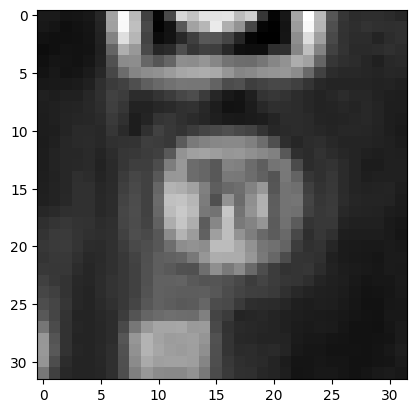

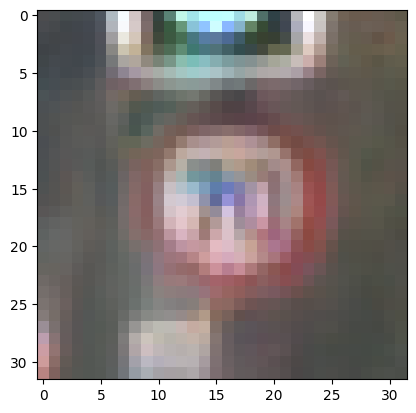

In [12]:
#lets see if we have preserved the actual features of image or not. 
i = 300
plt.imshow(X_train_gray[i].squeeze(),cmap='gray')#we use squeeze becuase we dont want the dimns to be 32 by 32 by 1 but 32 by 32.
y_train[i]
plt.figure() #create new image
plt.imshow(X_train[i]) #actual image

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,AveragePooling2D,Dense,Flatten,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import TensorBoard

In [14]:
cnn_model = Sequential()

In [15]:
cnn_model.add(Conv2D(filters = 6,kernel_size = (5,5),activation = 'relu',input_shape =(32,32,1))) #filters represent the depth,kernal size is size of filter layer,input shape is dimns of the input image
cnn_model.add(AveragePooling2D(pool_size=(2, 2)))

cnn_model.add(Conv2D(filters = 16,kernel_size = (5,5),activation = 'relu')) #filters represent the depth,kernal size is size of filer layer,input shape is dimns of the input image
cnn_model.add(AveragePooling2D(pool_size=(2, 2)))

cnn_model.add(Flatten())
#creating an artificial neural network
cnn_model.add(Dense(120,activation='relu'))
cnn_model.add(Dense(84,activation='relu'))
cnn_model.add(Dense(43,activation='softmax')) #output - hence 43 neurons corresponding to 43 classes

C:\Users\KARTIKAY K\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [16]:
cnn_model.compile(loss='sparse_categorical_crossentropy',optimizer=Adam(learning_rate=0.001),metrics=['accuracy'])

In [17]:
history = cnn_model.fit(X_train_gray_norm,y_train,batch_size=500,epochs = 20,verbose=1,validation_data=(X_validation_gray_norm,y_validation))

Epoch 1/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 8s 62ms/step - accuracy: 0.1002 - loss: 3.4518 - val_accuracy: 0.3104 - val_loss: 2.5786
Epoch 2/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 60ms/step - accuracy: 0.4587 - loss: 1.9640 - val_accuracy: 0.5741 - val_loss: 1.4334
Epoch 3/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 60ms/step - accuracy: 0.6895 - loss: 1.0630 - val_accuracy: 0.6780 - val_loss: 1.0920
Epoch 4/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 68ms/step - accuracy: 0.7769 - loss: 0.7713 - val_accuracy: 0.7383 - val_loss: 0.9014
Epoch 5/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 62ms/step - accuracy: 0.8319 - loss: 0.5956 - val_accuracy: 0.7646 - val_loss: 0.8036
Epoch 6/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - accuracy: 0.8638 - loss: 0.4933 - val_accuracy: 0.7991 - val_loss: 0.7310
Epoch 7/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 67ms/step - accuracy: 0.8867 - loss: 0.4211 - val_accuracy: 0.7982 - val_loss: 0.7349
Epoch 8/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 64ms/step - accuracy: 0.9017 - loss: 0.3608 - val_accuracy: 0.8014 - v

In [18]:
score = cnn_model.evaluate(X_test_gray_norm,y_test)
print('Test Accuracy:{}'.format(score[1]))

395/395 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8428 - loss: 0.9556
Test Accuracy:0.841251015663147


In [19]:
plott = pd.DataFrame(history.history)

<Axes: >

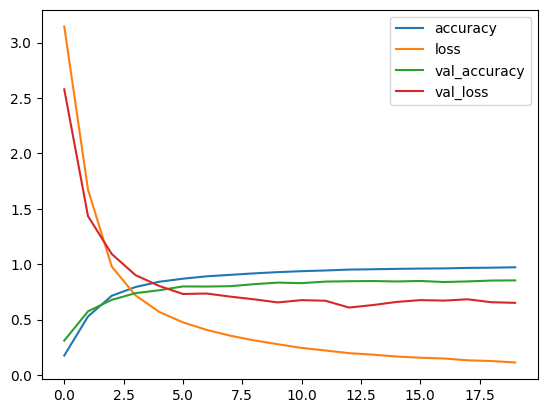

In [20]:
plott.plot()

In [25]:
predictions = cnn_model.predict(X_test_gray_norm)

# Get the class labels with highest probability for each prediction
predicted_classes = predictions.argmax(axis=-1)

395/395 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


In [29]:
accuracy_score(y_test,predicted_classes)

0.8412509897070467